monte carlo => loi forte des grands nombre

RAD, berouilli de loi 1/2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

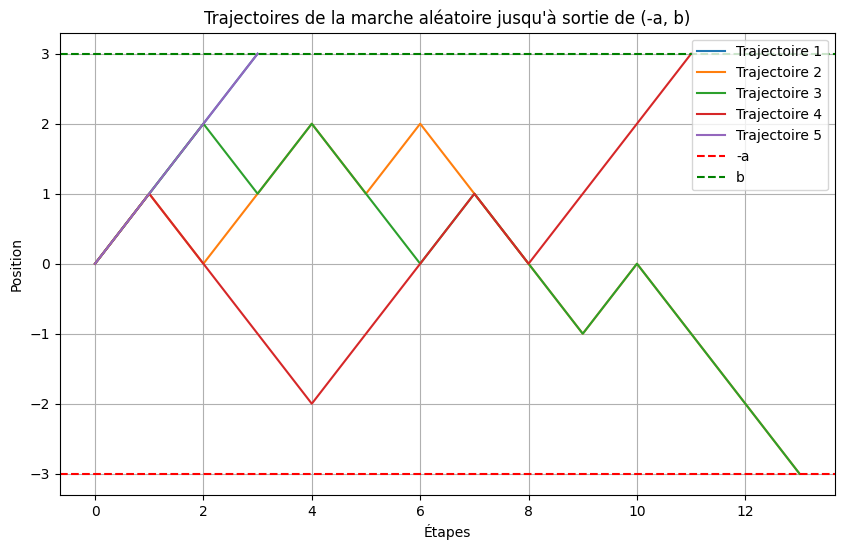

In [66]:
#Exercice 1

#Q1]
T = 10

def rademacher_random_variable(size=1):
    return np.random.choice([-1, 1], size=size)

def partie(a, b):
    X = [0]
    while True:
        ksi = rademacher_random_variable()[0]
        X.append(X[-1] + ksi)
        if X[-1] <= -a or X[-1] >= b:
            break
    return X

def trajectories(a, b, num_trajectories=10):
    trajectories = []
    for i in range(num_trajectories):
        trajectories.append(partie(a, b))
    return trajectories

def plot_trajectories(a, b, num_trajectories=100):
    plt.figure(figsize=(10, 6))
    for _ in range(num_trajectories):
        #print(partie(a, b))
        trajectory = np.array(partie(a, b))
        plt.plot(trajectory, label=f'Trajectoire {_+1}')
    plt.axhline(y=-a, color='r', linestyle='--', label='-a')
    plt.axhline(y=b, color='g', linestyle='--', label='b')
    plt.xlabel('Étapes')
    plt.ylabel('Position')
    plt.title('Trajectoires de la marche aléatoire jusqu\'à sortie de (-a, b)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paramètres
a = 3
b = 3

# Génération et affichage des trajectoires
plot_trajectories(a, b, num_trajectories=5)

#Q2] 
E(X[n+1]| Fn) = E( X[n] + ksi[n] | Fn) = E( X[n]| Fn) car E( ksi[n] | Fn) = 0, les (ksi[n]) sont i.i.d de loi commune Rad
et E( X[n]| Fn) = X[n], les (X[n]) étant Fn mesurables.
Finalement E(X[n+1]| Fn) = X[n]

#Q3]
Le temps d'arret est finit par Borel Cantelli
Théorème d'arret:
Le théorème d'arrêt pour les martingales stipule que si (Xn) est une martingale et T est un temps d'arrêt borné (ou intégrable si (Xn) est une martingale uniforme), alors :
E(XT) = E(X0) = 0

On pose p = P(XT = b) ; 1-p = P(XT = -a)
Donc E(XT) = b*p - a*(1-p) = 0
Donc p = a/a+b

Finalement, P(XT = b) = a/a+b

In [67]:
#Q4]

# Illustration du résultat par une méthode de Monte Carlo (Application de la loi forte des grands nombres):
# On simule plusieurs trajectoires et on vérifie que P(XT = b) = a/a+b
# On compte combien de fois la trajectoire touche b avant de toucher -a (succès)
# On estime la proportion

def monte_carlo_simulation(num_trajectories):
    trajectories_local = trajectories(a, b, num_trajectories)
    #print(trajectories_local)
    s = 0
    for traj in trajectories_local:
        #print(traj[-1])
        if traj[-1] == b:
            s += 1
    return s/len(trajectories_local)

therocal_proportion = a/(b+a)

num_trajectories = 10000
print(monte_carlo_simulation(num_trajectories)) # = 0.3964
print(therocal_proportion) # = 0.4


0.4965
0.5


#Q5]
On définit (Zn) par Zn = Xn**2 - n 
Par théorème de transfert, Xn**2 est Fn mesurable
Comme ksi est Rad, on a E(ksi**2) = 1
Donc E(Z[n+1]|Fn) = E(X[n+1]**2 - (n+1)|Fn) = E(Xn**2|Fn) + E(ksi**2|Fn) - n - 1, n étant une constante déterministe
Finalement, E(Z[n+1]|Fn) = Xn**2 - n = Zn
Donc Zn est une Martingale

#Q6]
D'après le théorème d'arret:
E(ZT) = E(Z0) = 0
ZT = a**2 - T si XT = -a
ZT = b**2 - T si XT = b

Donc E(ZT) = p * a**2 + (1-p) * b**2 - E(T), avec p = P(XT=b) = a/(a+b)
Donc E(T) = ab


In [73]:
#Q7] Illustration du résultat par une méthode de Monte Carlo
num_trajectories = 10000

trajectories_global = trajectories(a, b, num_trajectories)
total_lengths = sum(len(i)-1 for i in trajectories_global) # -a ou b est inclu dans la liste
approx_length = total_lengths/len(trajectories_global)

theorical_length = a*b

print(approx_length)
print(theorical_length)

9.0602
9


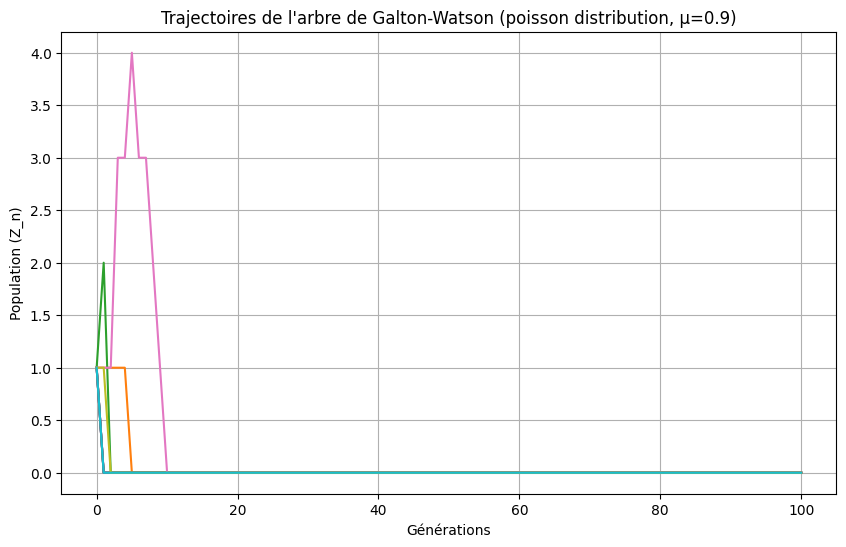

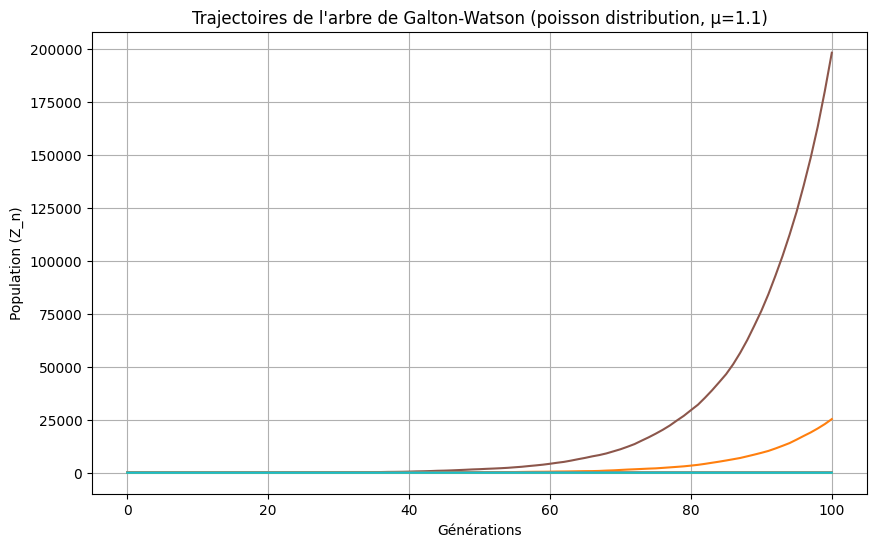

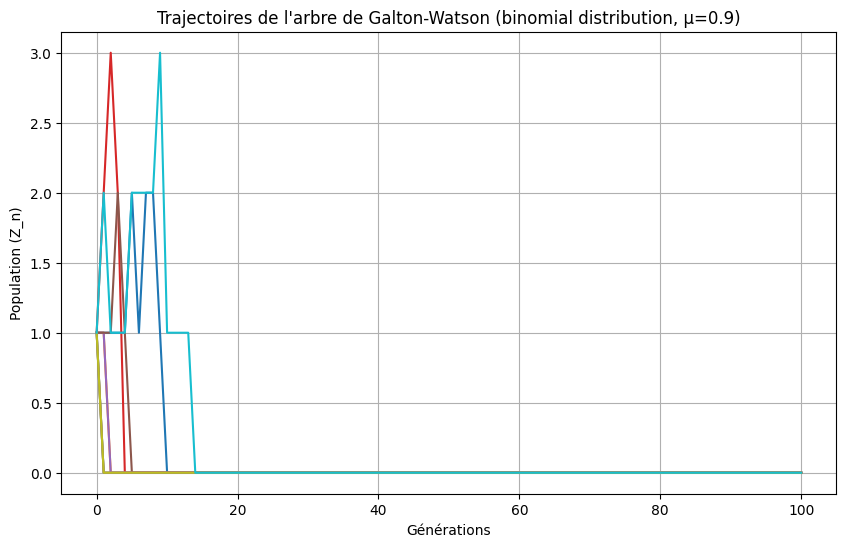

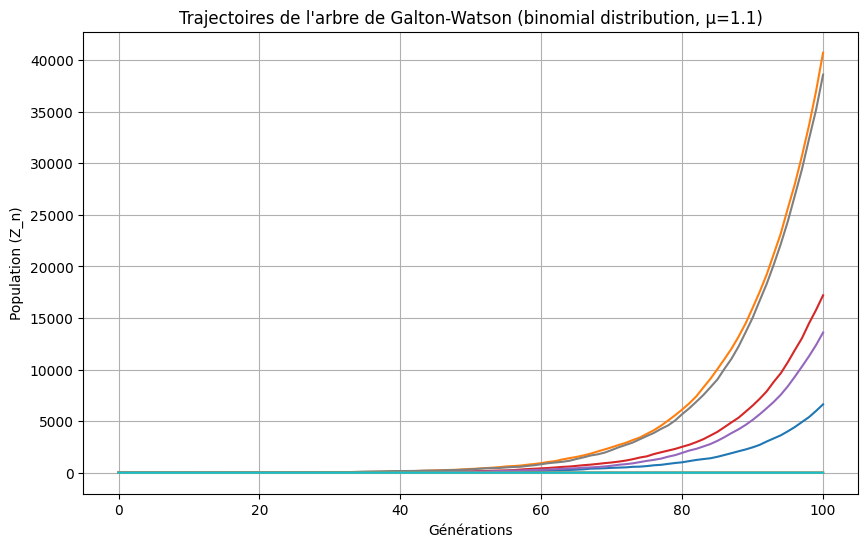

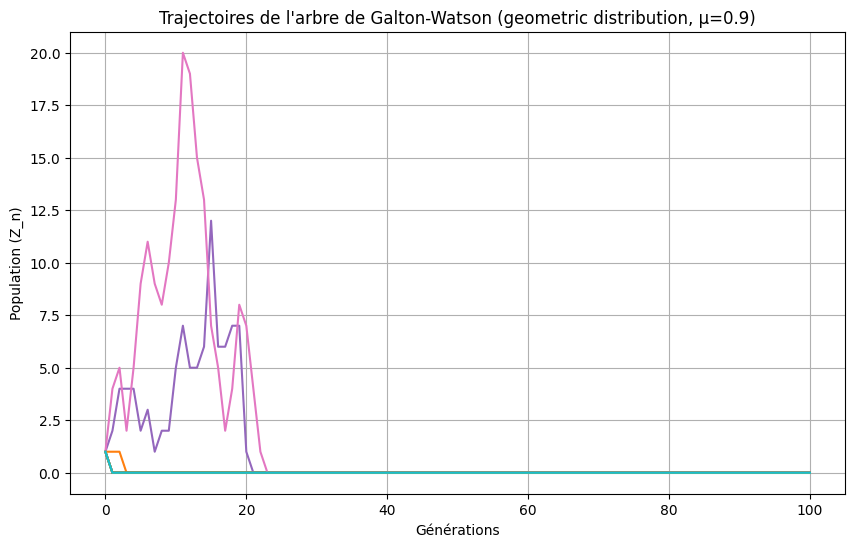

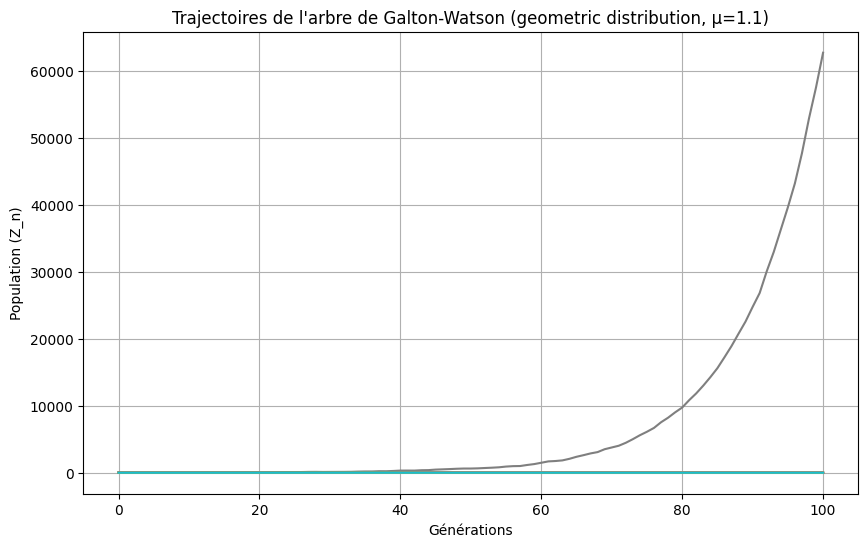

In [77]:
# Exercice 3

def simulate_galton_watson(mu, num_generations, initial_population=1, distribution='poisson'):
    Z = [initial_population]
    for n in range(num_generations):
        if Z[-1] == 0:
            Z.append(0)
        else:
            if distribution == 'poisson':
                offspring_counts = np.random.poisson(mu, Z[-1])
            elif distribution == 'binomial':
                offspring_counts = np.random.binomial(2, mu / 2, Z[-1])
            elif distribution == 'geometric':
                offspring_counts = np.random.geometric(1 / (mu + 1), Z[-1]) - 1
            else:
                raise ValueError("Distribution not supported")
            Z.append(np.sum(offspring_counts))
    return Z
        
def plot_trajectories(mu, num_generations, num_simulations, distribution='poisson'):
    plt.figure(figsize=(10, 6))
    for _ in range(num_simulations):
        trajectory = simulate_galton_watson(mu, num_generations, distribution=distribution)
        plt.plot(trajectory)
    plt.xlabel('Générations')
    plt.ylabel('Population (Z_n)')
    plt.title(f'Trajectoires de l\'arbre de Galton-Watson ({distribution} distribution, µ={mu})')
    plt.grid(True)
    plt.show()

# Paramètres
num_generations = 100
num_simulations = 10

# Tester avec différentes valeurs de µ et distributions
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='poisson')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='poisson')
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='binomial')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='binomial')
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='geometric')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='geometric')
